# $\textbf{LAB 04: Logistic Regression}$

## $\Large\textbf{Main Points}$

### $\textit{Topics we will cover:}$

* $\bullet$ Implement logistic regression classifier with sigmoid activation
* $\bullet$ Code gradient descent optimization from scratch  
* $\bullet$ Build the model that outputs probabilities instead of hard decisions
* $\bullet$ Track loss convergence during training
* $\bullet$ Compare performance on training and test data
* $\bullet$ Example using sklearn's LogisticRegression

---

For visualization of gradient descent: [Gradient Descent Visualizer](https://www.deeplearning.ai/ai-notes/optimization/) (Near the end of the page)

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


## $\textbf{The Dataset: Tumor Classification}$

We use breast cancer data predicting whether a tumor is malignant based on:

* $\textbf{Tumor Radius}$: Size of the tumor (normalized)
* $\textbf{Tumor Texture}$: Roughness measurement (normalized)
* $\textbf{Target}$: Binary classification - Benign (1) / Malignant (0)


---

# Part 1: Data loading

In [ ]:
data = load_breast_cancer() # breast cancer dataset from sklearn

# here we will only use first 2 features

X = data.data[:, [0, 1]]  # radius and texture
y = data.target  # 1 = benign, 0 = malignant



# create dataframe
df = pd.DataFrame(X, columns=['radius', 'texture'])
df['diagnosis'] = y




print(df.head())
print(f"Dataset shape: {df.shape}")
print(f"Benign samples: {(y == 1).sum()}")
print(f"Malignant samples: {(y == 0).sum()}")



# Normalization, note from last lab, we also went over the effect of this on the model's result
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std




print(f"Feature dimensions: {X_normalized.shape}")
print(f"Number of samples: {len(y)}")

   radius  texture  diagnosis
0   17.99    10.38          0
1   20.57    17.77          0
2   19.69    21.25          0
3   11.42    20.38          0
4   20.29    14.34          0
Dataset shape: (569, 3)
Benign samples: 357
Malignant samples: 212
Feature dimensions: (569, 2)
Number of samples: 569


# Part 2: Implement Logistic Regression

### Logistic Regression
The model outputs probability using sigmoid function:

$p = \sigma(\theta^T X + \theta_0) = \frac{1}{1 + e^{-(\theta^T X + \theta_0)}}$

where sigmoid squashes any value to range (0, 1)

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, n_iterations=300):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.theta0 = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):  # negative log likelihood

        m = len(y)
        z = X.dot(self.theta) + self.theta0
        predictions = self.sigmoid(z)


        epsilon = 1e-7 # we will just define this to avoid having a log(0)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)

        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def fit(self, X, y):

        n_samples, n_features = X.shape                      # initialization of parameters
        self.theta = np.random.randn(n_features) * 0.01      # initialization of parameters
        self.theta0 = 0                                      # initialization of parameters


        for iteration in range(self.n_iterations):   # ---------> Here we begin the gradient descent
            # forward pass
            z = X.dot(self.theta) + self.theta0
            predictions = self.sigmoid(z)

            # compute loss
            loss = self.compute_loss(X, y)
            self.loss_history.append(loss)

            # compute gradients
            errors = predictions - y
            grad_theta = (1/n_samples) * X.T.dot(errors)
            grad_theta0 = (1/n_samples) * np.sum(errors)

            # update parameters
            self.theta -= self.learning_rate * grad_theta
            self.theta0 -= self.learning_rate * grad_theta0

            if iteration % 50 == 0:
                print(f"  Iteration {iteration}: Loss = {loss:.3f}")

        return self

    def predict_proba(self, X):
        z = X.dot(self.theta) + self.theta0
        return self.sigmoid(z)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Part 3: Train and Evaluate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_normalized, y, test_size=0.3, random_state=42) #  data splitting into training and test sets

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 398
Test samples: 171


In [ ]:
learning_rates = [0.01, 0.1, 1.0, 5.0]
results = []

best_model = None
best_accuracy = 0



for lr in learning_rates:
    print(f" going over with learning rate = {lr}")
    model = LogisticRegression(learning_rate=lr, n_iterations=200)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    results.append({
        'learning_rate': lr,
        'train_acc': train_acc * 100,
        'test_acc': test_acc * 100,
        'final_loss': model.loss_history[-1]
    })

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = model
        best_lr = lr


    print(f"Training accuracy: {train_acc:}")

    print(f"  Test accuracy: {test_acc:}")

 going over with learning rate = 0.01
  Iteration 0: Loss = 0.690
  Iteration 50: Loss = 0.617
  Iteration 100: Loss = 0.562
  Iteration 150: Loss = 0.520
Training accuracy: 0.8793969849246231
  Test accuracy: 0.8888888888888888
 going over with learning rate = 0.1
  Iteration 0: Loss = 0.686
  Iteration 50: Loss = 0.387
  Iteration 100: Loss = 0.333
  Iteration 150: Loss = 0.311
Training accuracy: 0.8844221105527639
  Test accuracy: 0.9064327485380117
 going over with learning rate = 1.0
  Iteration 0: Loss = 0.690
  Iteration 50: Loss = 0.282
  Iteration 100: Loss = 0.278
  Iteration 150: Loss = 0.278
Training accuracy: 0.8894472361809045
  Test accuracy: 0.9064327485380117
 going over with learning rate = 5.0
  Iteration 0: Loss = 0.695
  Iteration 50: Loss = 0.278
  Iteration 100: Loss = 0.278
  Iteration 150: Loss = 0.278
Training accuracy: 0.8894472361809045
  Test accuracy: 0.9064327485380117


# Part 4: Visualize the results

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

   learning_rate  train_acc   test_acc  final_loss
0           0.01  87.939698  88.888889    0.488658
1           0.10  88.442211  90.643275    0.300378
2           1.00  88.944724  90.643275    0.277936
3           5.00  88.944724  90.643275    0.277924


  Iteration 0: Loss = 0.701
  Iteration 50: Loss = 0.625
  Iteration 100: Loss = 0.568
  Iteration 150: Loss = 0.525
  Iteration 200: Loss = 0.492
  Iteration 250: Loss = 0.465
  Iteration 0: Loss = 0.698
  Iteration 50: Loss = 0.388
  Iteration 100: Loss = 0.333
  Iteration 150: Loss = 0.312
  Iteration 200: Loss = 0.300
  Iteration 250: Loss = 0.294
  Iteration 0: Loss = 0.697
  Iteration 50: Loss = 0.282
  Iteration 100: Loss = 0.278
  Iteration 150: Loss = 0.278
  Iteration 200: Loss = 0.278
  Iteration 250: Loss = 0.278
  Iteration 0: Loss = 0.691
  Iteration 50: Loss = 0.278
  Iteration 100: Loss = 0.278
  Iteration 150: Loss = 0.278
  Iteration 200: Loss = 0.278
  Iteration 250: Loss = 0.278


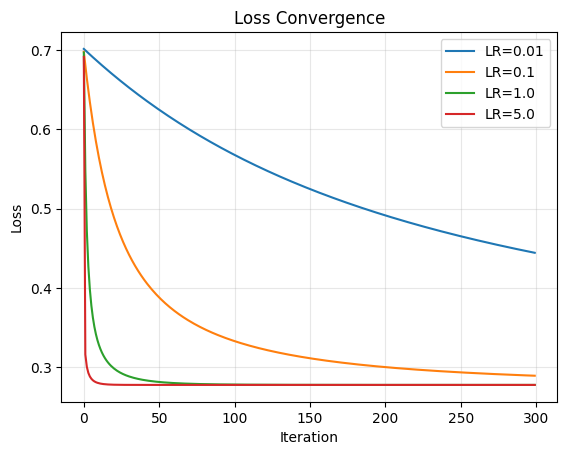

In [ ]:

for i, lr in enumerate(learning_rates[:4]):  # here we try to plot the 4 curves
    model = LogisticRegression(learning_rate=lr, n_iterations=300)
    model.fit(X_train, y_train)
    plt.plot(model.loss_history, label=f'LR={lr}')


plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid(alpha=0.3)


# Part 6: Analyzing Predictions
This is a simple confidence check, the goal from this is to get the least confident and the most confident predictions


In [ ]:
test_probs = best_model.predict_proba(X_test) # getting the saved predictions

confidence = np.abs(test_probs - 0.5) * 2  # convert to 0-1 scale
most_confident = np.argmax(confidence)
least_confident = np.argmin(confidence)

print(f"Most confident: P={test_probs[most_confident]:}")
print(f"Least confident: P={test_probs[least_confident]:}")

Most confident: P=0.0011745903380500661
Least confident: P=0.5050096704096069


# Part 7: Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression as SklearnLogistic

# train sklearn model
sklearn_model = SklearnLogistic(max_iter=1000, random_state=42)
sklearn_model.fit(X_train, y_train)

sklearn_train_acc = sklearn_model.score(X_train, y_train)
sklearn_test_acc = sklearn_model.score(X_test, y_test)

print(f"Sklearn - train: {sklearn_train_acc:}")
print(f"Sklearn -  test: {sklearn_test_acc:}")

Sklearn - train: 0.8869346733668342
Sklearn -  test: 0.9064327485380117


------------------------

---------------

-------------------


# Task 1: Implement prediction threshold analysis

Hint: Try different thresholds (0.3, 0.5, 0.7) and see how accuracy changes

# Task 2: Add L2 regularization to the model

Hint: Add $\lambda||\theta||^2$ term to the loss and λθ to the gradient

# Task 3: Implement mini-batch gradient descent

Hint: Instead of using all samples, randomly select a batch for each update



-----------------------------------------

*Sapere aude*